In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [ ]:
x_train = np.expand_dims(x_train, -1)

In [ ]:
x_test = np.expand_dims(x_test, -1)

In [ ]:
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
print(x_test.shape)

(10000, 28, 28, 1)


In [ ]:
nc = len(set(y_train))
print(nc)

10


In [ ]:
# build model
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(nc, activation = 'softmax')(x)
model = Model(i, x)

In [ ]:
# compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.7446 - loss: 0.6954 - val_accuracy: 0.8408 - val_loss: 0.4209
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.8600 - loss: 0.3750 - val_accuracy: 0.8678 - val_loss: 0.3459
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8842 - loss: 0.3110 - val_accuracy: 0.8801 - val_loss: 0.3198
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.8947 - loss: 0.2807 - val_accuracy: 0.8857 - val_loss: 0.3164
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9088 - loss: 0.2425 - val_accuracy: 0.8943 - val_loss: 0.3005


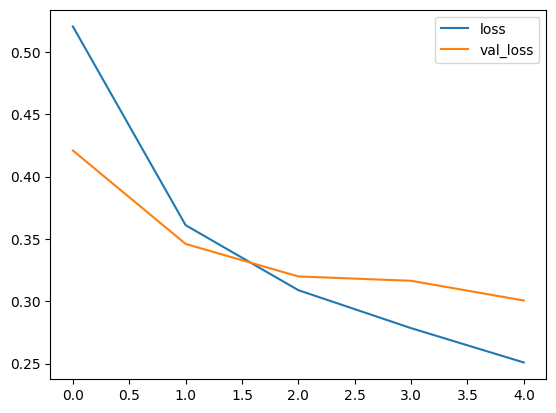

In [ ]:
# plot loss per iteration
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()

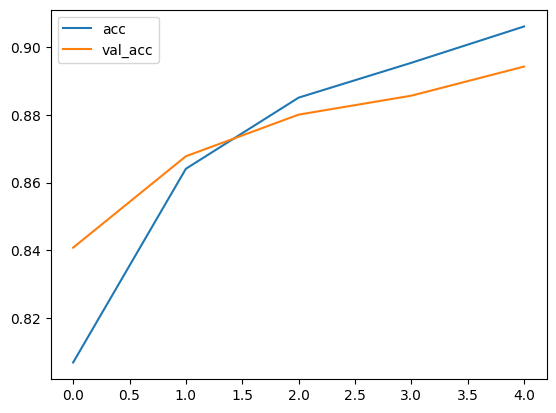

In [ ]:
# plot acc per iteration
# from matplotlib.font_manager import FontProperties
plt.plot(result.history['accuracy'], label='acc')
plt.plot(result.history['val_accuracy'], label='val_acc')
# font_properties = FontProperties(family='verdana', size=12)
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confustion matrix without normalization
[[849   2  30  19   2   2  79   0  16   1]
 [  3 970   0  21   2   0   3   0   1   0]
 [ 15   0 886   6  41   0  49   0   3   0]
 [ 12   0  33 903  32   1  13   0   6   0]
 [  0   1  85  25 825   0  59   0   5   0]
 [  0   0   0   2   0 972   0  18   0   8]
 [113   0  86  32  95   0 652   0  22   0]
 [  0   0   0   0   0  11   0 933   0  56]
 [  0   1   4   4   4   2   3   0 979   3]
 [  1   0   0   0   0   7   0  18   0 974]]


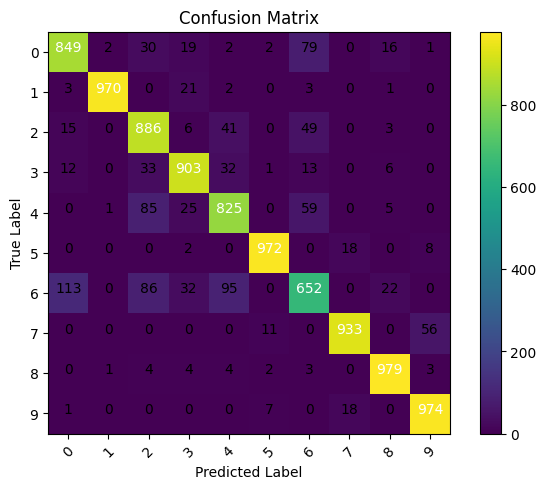

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_cm(cm, classes,
            normalize=False,
            title='Confusion Matrix',
            cmap=plt.cm.viridis):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('normalized confustion matrix')
  else:
    print('Confustion matrix without normalization')

  print(cm)
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_cm(cm, list(range(10)))

In [ ]:
# labels mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truk'''.split()

Text(0.5, 1.0, 'True Labels: bird Predicted: frog')

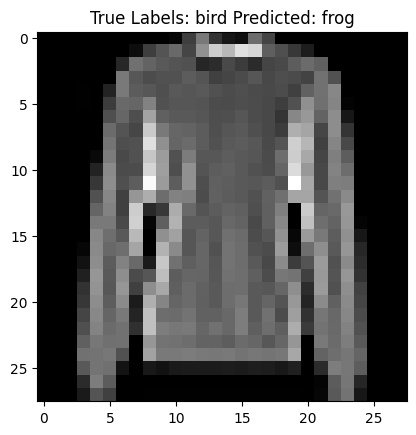

In [ ]:
# some misclassified items
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Labels: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))